In [ ]:
import torch

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5))
])

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 24943715.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1690682.27it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8973659.12it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1448378.98it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 10000, shuffle = True)

In [ ]:
class DNN(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(28*28, 250)
        self.fc2 = nn.Linear(250, 75)
        self.fc3 = nn.Linear(75, 36)
        self.out = nn.Linear(36, 10)

    def forward(self, X):

        X = X.view(-1, 28*28)
        X = F.tanh(self.fc1(X))
        X = F.tanh(self.fc2(X))
        X = F.tanh(self.fc3(X))
        X = self.out(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = DNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = .01)

In [ ]:
def getLayerWeights(model):

    weights = model.fc3.weight.data

    row_list = []

    for weight_row in weights:

        row_list.append(weight_row.view(-1))

    layer_weights = torch.cat(row_list, dim=0)

    return layer_weights

def getModelWeights(model):

    row_list = []

    for param in model.parameters():

      if (param.ndimension() > 1):

        row_list.append(param.data.view(-1))

    model_weights = torch.cat(row_list, dim=0)

    return model_weights


In [ ]:
def pca(tensor):

    U, S, V = torch.pca_lowrank(tensor, q=2)
    weights_reduced = torch.matmul(tensor, V[: , 0:2])

    return weights_reduced

In [ ]:
def normalize(tensor):

  mean = tensor.mean()
  std = tensor.std()

  normalized_tensor = (tensor - mean) / std

  return normalized_tensor

In [ ]:
def min_max(tensor):

  min = tensor.min()
  max = tensor.max()

  normalized_tensor = (tensor - min) / (max - min)

  return normalized_tensor

In [ ]:
layer_weights_list = []
model_weights_list = []
loss_list = []
epochs = 30
palette = ['red', 'blue', 'green', 'cyan', 'magenta', 'violet', 'black', 'gray']
loss_to_plot = 0

In [ ]:
epoch_ind = 1
for i in range(8):
  print('Train: ' + str(i))
  for epoch in range(epochs):
    print('Epoch: ' + str(epoch))
    for data, target in train_loader:

      optimizer.zero_grad()
      y_pred = model(data)
      loss = criterion(y_pred, target)
      loss.backward()
      optimizer.step()
      loss_to_plot += loss.item()

    if (epoch_ind == 3):

      layer_weights_list.append(getLayerWeights(model))
      model_weights_list.append(getModelWeights(model))
      loss_list.append(loss_to_plot)
      loss_to_plot = 0
      epoch_ind = 0

    epoch_ind += 1

  train_loader = DataLoader(train_dataset, batch_size = 10000, shuffle = True)

Train: 0
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train: 1
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train: 2
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Train: 3
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoc

In [ ]:
layer_weights_tens = torch.stack(layer_weights_list)
model_weights_tens = torch.stack(model_weights_list)

layer_tens_normal = normalize(layer_weights_tens)
model_tens_normal = normalize(model_weights_tens)

layer_tens_min_max = min_max(layer_weights_tens)
model_tens_min_max = min_max(model_weights_tens)


In [ ]:
layer_pca = pca(layer_weights_tens)
model_pca = pca(model_weights_tens)

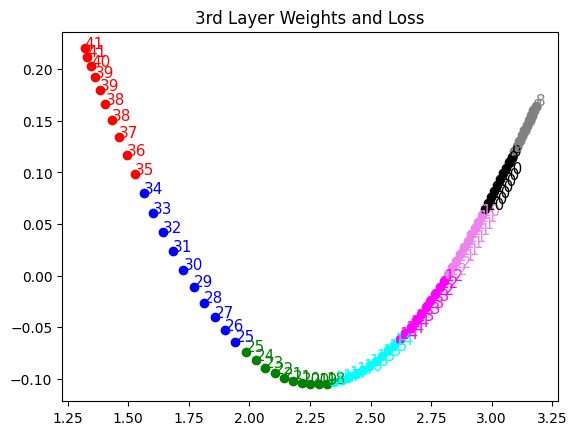

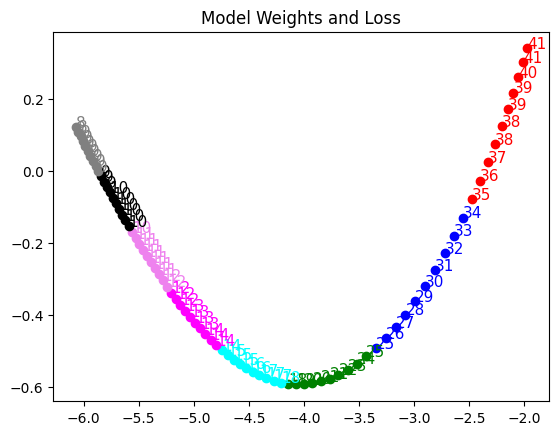

In [ ]:
color_ind = 0
plt.figure(1)
plt.title('3rd Layer Weights and Loss')

plt.figure(2)
plt.title('Model Weights and Loss')

ind = 1

for loss_ind in range(len(loss_list)):

    if (ind % 11 == 0):
        ind = 1
        color_ind +=1

    loss_str = str(round(loss_list[loss_ind]))
    lay_weight0 = layer_pca[loss_ind, 0].item()
    lay_weight1 = layer_pca[loss_ind, 1].item()

    plt.figure(1)
    plt.plot(lay_weight0, lay_weight1, marker='o', color=palette[color_ind])
    plt.text(lay_weight0, lay_weight1, loss_str, fontsize=11, color=palette[color_ind])

    mod_weight0 = model_pca[loss_ind, 0].item()
    mod_weight1 = model_pca[loss_ind, 1].item()

    plt.figure(2)
    plt.plot(mod_weight0, mod_weight1, marker='o', color=palette[color_ind])
    plt.text(mod_weight0, mod_weight1, loss_str, fontsize=11, color=palette[color_ind])

    ind += 1

In [ ]:
layer_weights_norm_0 = F.normalize(layer_weights_tens, p=2, dim=0)
model_weights_norm_0 = F.normalize(model_weights_tens, p=2, dim=0)

layer0_pca = pca(layer_weights_norm_0)
model0_pca = pca(model_weights_norm_0)


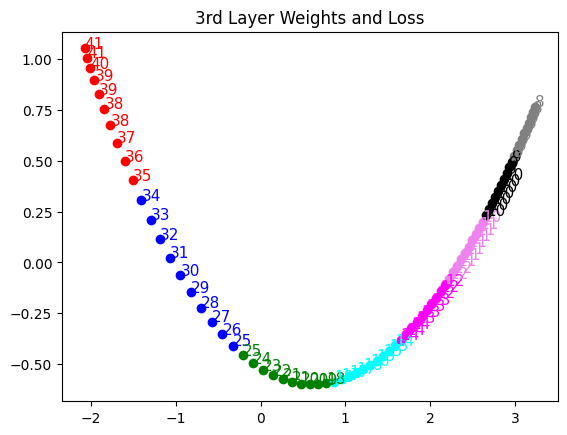

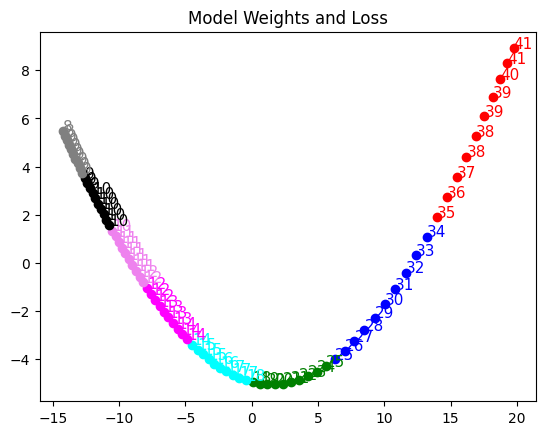

In [ ]:
color_ind = 0
plt.figure(1)
plt.title('3rd Layer Weights and Loss')

plt.figure(2)
plt.title('Model Weights and Loss')

ind = 1

for loss_ind in range(len(loss_list)):

    if (ind % 11 == 0):
        ind = 1
        color_ind +=1

    loss_str = str(round(loss_list[loss_ind]))
    lay_weight0 = layer0_pca[loss_ind, 0].item()
    lay_weight1 = layer0_pca[loss_ind, 1].item()

    plt.figure(1)
    plt.plot(lay_weight0, lay_weight1, marker='o', color=palette[color_ind])
    plt.text(lay_weight0, lay_weight1, loss_str, fontsize=11, color=palette[color_ind])

    mod_weight0 = model0_pca[loss_ind, 0].item()
    mod_weight1 = model0_pca[loss_ind, 1].item()

    plt.figure(2)
    plt.plot(mod_weight0, mod_weight1, marker='o', color=palette[color_ind])
    plt.text(mod_weight0, mod_weight1, loss_str, fontsize=11, color=palette[color_ind])

    ind += 1

In [ ]:
layer_weights_norm_1 = F.normalize(layer_weights_tens, p=2, dim=1)
model_weights_norm_1 = F.normalize(model_weights_tens, p=2, dim=1)

layer1_pca = pca(layer_weights_norm_1)
model1_pca = pca(model_weights_norm_1)

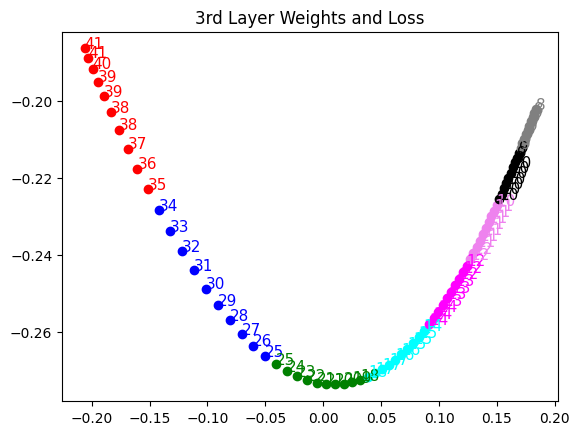

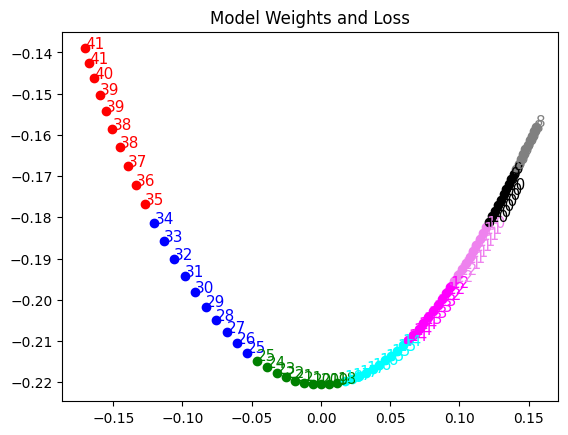

In [ ]:
color_ind = 0
plt.figure(1)
plt.title('3rd Layer Weights and Loss')

plt.figure(2)
plt.title('Model Weights and Loss')

ind = 1

for loss_ind in range(len(loss_list)):

    if (ind % 11 == 0):
        ind = 1
        color_ind +=1

    loss_str = str(round(loss_list[loss_ind]))
    lay_weight0 = layer1_pca[loss_ind, 0].item()
    lay_weight1 = layer1_pca[loss_ind, 1].item()

    plt.figure(1)
    plt.plot(lay_weight0, lay_weight1, marker='o', color=palette[color_ind])
    plt.text(lay_weight0, lay_weight1, loss_str, fontsize=11, color=palette[color_ind])

    mod_weight0 = model1_pca[loss_ind, 0].item()
    mod_weight1 = model1_pca[loss_ind, 1].item()

    plt.figure(2)
    plt.plot(mod_weight0, mod_weight1, marker='o', color=palette[color_ind])
    plt.text(mod_weight0, mod_weight1, loss_str, fontsize=11, color=palette[color_ind])

    ind += 1

In [ ]:
layer_tens_norm_pca = pca(layer_tens_normal)
model_tens_norm_pca = pca(model_tens_normal)

layer_tens_min_max_pca = pca(layer_tens_min_max)
model_tens_min_max_pca = pca(model_tens_min_max)

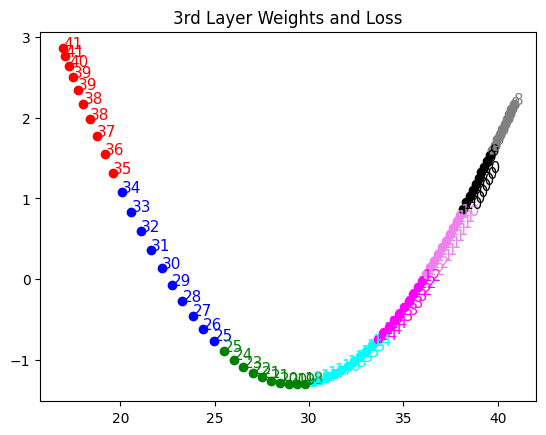

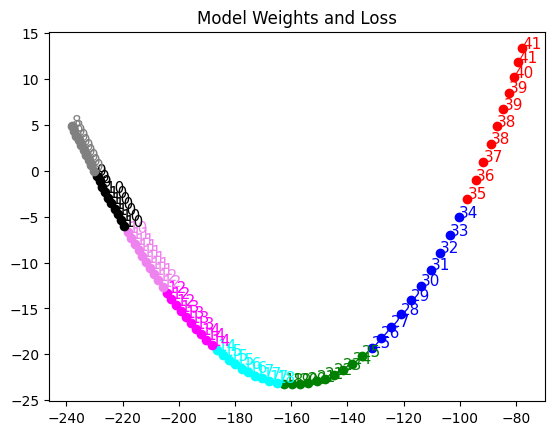

In [ ]:
color_ind = 0
plt.figure(1)
plt.title('3rd Layer Weights and Loss')

plt.figure(2)
plt.title('Model Weights and Loss')

ind = 1

for loss_ind in range(len(loss_list)):

    if (ind % 11 == 0):
        ind = 1
        color_ind +=1

    loss_str = str(round(loss_list[loss_ind]))
    lay_weight0 = layer_tens_norm_pca[loss_ind, 0].item()
    lay_weight1 = layer_tens_norm_pca[loss_ind, 1].item()

    plt.figure(1)
    plt.plot(lay_weight0, lay_weight1, marker='o', color=palette[color_ind])
    plt.text(lay_weight0, lay_weight1, loss_str, fontsize=11, color=palette[color_ind])

    mod_weight0 = model_tens_norm_pca[loss_ind, 0].item()
    mod_weight1 = model_tens_norm_pca[loss_ind, 1].item()

    plt.figure(2)
    plt.plot(mod_weight0, mod_weight1, marker='o', color=palette[color_ind])
    plt.text(mod_weight0, mod_weight1, loss_str, fontsize=11, color=palette[color_ind])

    ind += 1

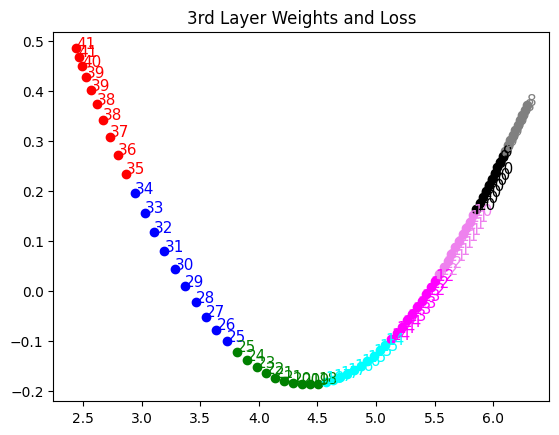

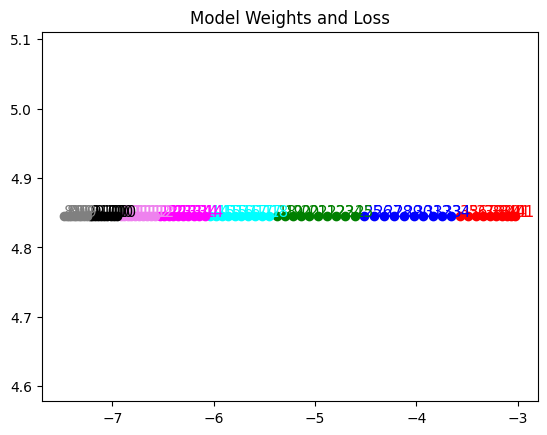

In [ ]:
color_ind = 0
plt.figure(1)
plt.title('3rd Layer Weights and Loss')

plt.figure(2)
plt.title('Model Weights and Loss')

ind = 1

for loss_ind in range(len(loss_list)):

    if (ind % 11 == 0):

        ind = 1
        color_ind +=1

    loss_str = str(round(loss_list[loss_ind]))
    lay_weight0 = layer_tens_min_max_pca[loss_ind, 0].item()
    lay_weight1 = layer_tens_min_max_pca[loss_ind, 1].item()

    plt.figure(1)
    plt.plot(lay_weight0, lay_weight1, marker='o', color=palette[color_ind])
    plt.text(lay_weight0, lay_weight1, loss_str, fontsize=11, color=palette[color_ind])

    mod_weight0 = model_tens_min_max_pca[loss_ind, 0].item()
    mod_weigth1 = model_tens_min_max_pca[loss_ind, 1].item()

    plt.figure(2)
    plt.plot(mod_weight0, mod_weight1, marker='o', color=palette[color_ind])
    plt.text(mod_weight0, mod_weight1, loss_str, fontsize=11, color=palette[color_ind])

    ind += 1

In [ ]:
layer_tens_pca_norm = normalize(layer_tens_norm_pca)
model_tens_pca_norm = normalize(model_tens_norm_pca)

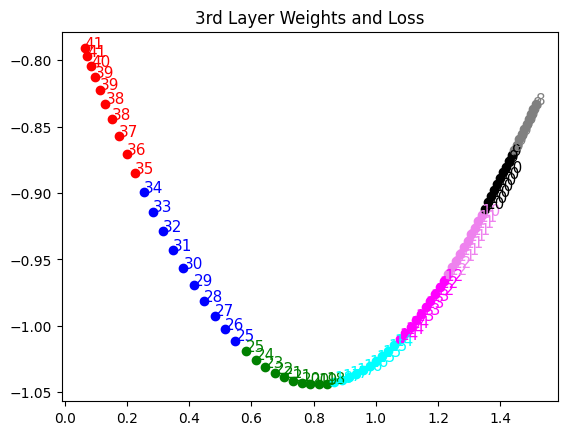

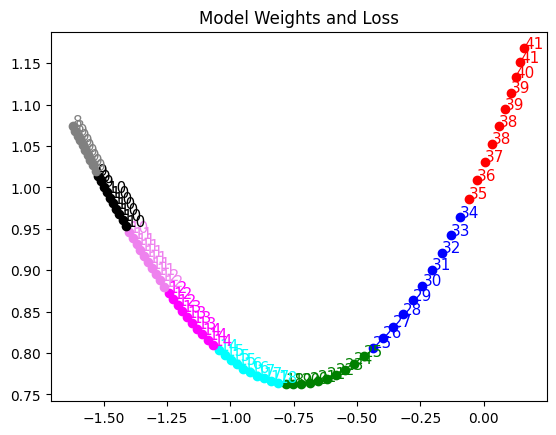

In [ ]:
color_ind = 0
plt.figure(1)
plt.title('3rd Layer Weights and Loss')

plt.figure(2)
plt.title('Model Weights and Loss')

ind = 1

for loss_ind in range(len(loss_list)):

    if (ind % 11 == 0):

        ind = 1
        color_ind +=1

    loss_str = str(round(loss_list[loss_ind]))
    lay_weight0 = layer_tens_pca_norm[loss_ind, 0].item()
    lay_weight1 = layer_tens_pca_norm[loss_ind, 1].item()

    plt.figure(1)
    plt.plot(lay_weight0, lay_weight1, marker='o', color=palette[color_ind])
    plt.text(lay_weight0, lay_weight1, loss_str, fontsize=11, color=palette[color_ind])

    mod_weight0 = model_tens_pca_norm[loss_ind, 0].item()
    mod_weight1 = model_tens_pca_norm[loss_ind, 1].item()

    plt.figure(2)
    plt.plot(mod_weight0, mod_weight1, marker='o', color=palette[color_ind])
    plt.text(mod_weight0, mod_weight1, loss_str, fontsize=11, color=palette[color_ind])

    ind += 1

In [ ]:
ind = 1
row = []

for loss in loss_list:

  row.append(loss)

  if (ind%11 == 0):

    print(row)
    ind = 1
    row = []

  ind += 1

[41.183621406555176, 40.60678434371948, 40.057859897613525, 39.496227502822876, 38.89709544181824, 38.2463698387146, 37.53714299201965, 36.76734733581543, 35.938876152038574, 35.057088971138, 34.130292534828186]
[33.16872954368591, 32.183446526527405, 31.185296893119812, 30.184260368347168, 29.18928325176239, 28.20845079421997, 27.248730897903442, 26.3156920671463, 25.414239287376404, 24.547600269317627]
[23.718239068984985, 22.92735517024994, 22.175479531288147, 21.46260929107666, 20.787614941596985, 20.149944186210632, 19.547754645347595, 18.97938871383667, 18.443098545074463, 17.937160551548004]
[17.459366261959076, 17.00788450241089, 16.580960273742676, 16.17673099040985, 15.793613016605377, 15.429880738258362, 15.084441304206848, 14.756043076515198, 14.443182587623596, 14.145011842250824]
[13.860642611980438, 13.589282989501953, 13.329531788825989, 13.081494629383087, 12.843962252140045, 12.616675555706024, 12.39868313074112, 12.189759075641632, 11.989285051822662, 11.796693086624